## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [36]:
#Import Initial Libraries and Data Set
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('data/kc_house_data.csv')

In [37]:
#Quick Look at Data

data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [38]:
#Nan Value Clean Up

data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [39]:
#Nan Value Checks

print(data['view'].value_counts())
print(data['waterfront'].value_counts())
print(data['yr_renovated'].value_counts())

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64
0.0    19075
1.0      146
Name: waterfront, dtype: int64
0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64


In [40]:
#Convert NA values in 'waterfront' to 0

data['view'] = data['view'].replace(np.nan, 0)

#Convert NA values in 'waterfront' to 0

data['waterfront'] = data['waterfront'].replace(np.nan, 0)

#Convert NA values in 'yr_renovated' to 0

data['yr_renovated'] = data['yr_renovated'].replace(np.nan, 0)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  float64
 9   view           21597 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

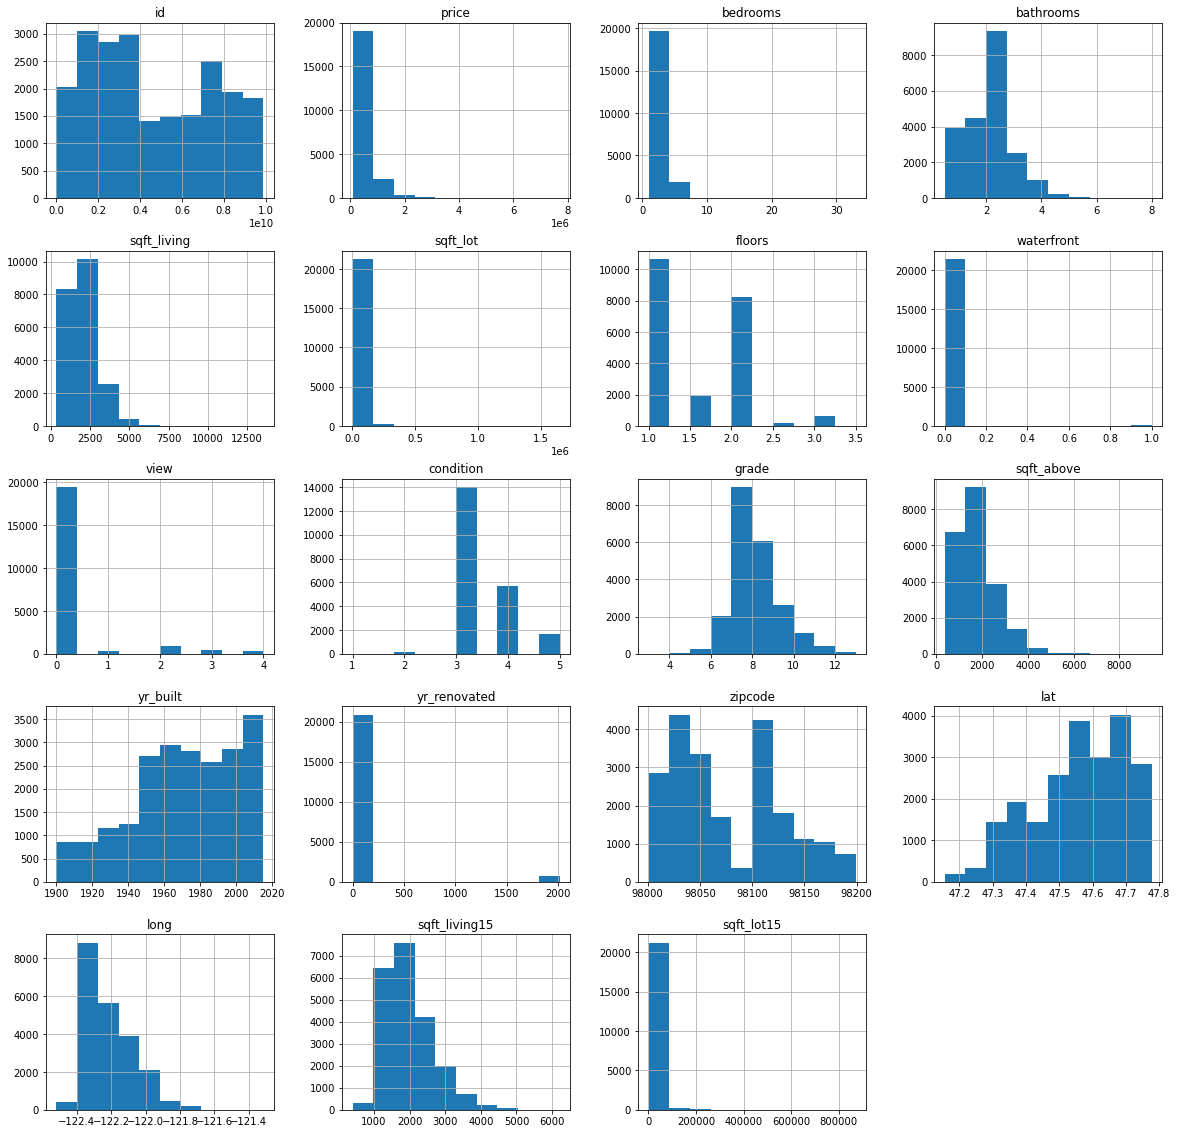

In [42]:
#Checking Cat Types

data.hist(figsize=(20,20));

In [43]:
#Seperate Cat Data from Cont Data

cont_data = ['sqft_living', 'sqft_lot', 'grade', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'sqft_basement']

cat_data = []

target_variable =['price']

for item in data.columns:
    if item not in cont_data:
        cat_data.append(item)

In [44]:
#Fix question marks in basement

data['sqft_basement'].replace({"?": float(0)}, inplace=True)

In [45]:
#remove 'id', 'price' and 'basement' from cat_data

cat_data.remove('id')

cat_data.remove('price')

cont_data.remove('sqft_basement')


In [46]:
#Check cat_data and cont_data

print('cat_data: ')
print(cat_data)

print('cont_data: ')
print(cont_data)

cat_data: 
['date', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long']
cont_data: 
['sqft_living', 'sqft_lot', 'grade', 'sqft_above', 'sqft_living15', 'sqft_lot15']


In [47]:
#Quick Processing Data

###Ignore warnings:

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

#One Hot (So Hawt) Encode

data_ohe = pd.get_dummies(data[cat_data])

#Create Cont Dataset

data_cont = data[cont_data]

#Log Cont Data

logged_features = []

for item in list(data_cont.columns):
    data_cont[f'{item}_log'] = np.log(data_cont[item])
    logged_features.append(f'{item}_log')
    
#Scale Cont Data
    
scaled_features = []

for item in logged_features:
    data_cont[f'{item}_scaled'] = StandardScaler().fit_transform(data_cont[item].values.reshape(-1, 1))
    scaled_features.append(f'{item}_scaled')
    
#Log Target Variable

data['price_logged'] = np.log(data['price'])

#Create Features DataFrame
    
features_df = pd.concat([data['price_logged'], data_cont[scaled_features], data_ohe], axis = 1)

In [48]:
#Quick Check: features_df

data_ohe

,bedrooms,bathrooms,floors,waterfront,view,condition,yr_built,yr_renovated,zipcode,lat,...,date_9/28/2014,date_9/29/2014,date_9/3/2014,date_9/30/2014,date_9/4/2014,date_9/5/2014,date_9/6/2014,date_9/7/2014,date_9/8/2014,date_9/9/2014
0,3,1.00,1.0,0.0,0.0,3,1955,0.0,98178,47.5112,...,0,0,0,0,0,0,0,0,0,0
1,3,2.25,2.0,0.0,0.0,3,1951,1991.0,98125,47.7210,...,0,0,0,0,0,0,0,0,0,0
2,2,1.00,1.0,0.0,0.0,3,1933,0.0,98028,47.7379,...,0,0,0,0,0,0,0,0,0,0
3,4,3.00,1.0,0.0,0.0,5,1965,0.0,98136,47.5208,...,0,0,0,0,0,0,0,0,0,0
4,3,2.00,1.0,0.0,0.0,3,1987,0.0,98074,47.6168,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,3.0,0.0,0.0,3,2009,0.0,98103,47.6993,...,0,0,0,0,0,0,0,0,0,0
21593,4,2.50,2.0,0.0,0.0,3,2014,0.0,98146,47.5107,...,0,0,0,0,0,0,0,0,0,0
21594,2,0.75,2.0,0.0,0.0,3,2009,0.0,98144,47.5944,...,0,0,0,0,0,0,0,0,0,0
21595,3,2.50,2.0,0.0,0.0,3,2004,0.0,98027,47.5345,...,0,0,0,0,0,0,0,0,0,0


In [49]:
#Model 1: Dumbest Model

#Establish X and y

X = features_df.drop(columns = ['price_logged'])
y = features_df['price_logged']

#Instantiate Linear Regression and execute Cross Val Score for Model Validation

linreg = LinearRegression()

np.mean(cross_val_score(linreg, X, y, cv = 10, scoring='r2'))


-1974500662391713.2

In [50]:
X

,sqft_living_log_scaled,sqft_lot_log_scaled,grade_log_scaled,sqft_above_log_scaled,sqft_living15_log_scaled,sqft_lot15_log_scaled,bedrooms,bathrooms,floors,waterfront,...,date_9/28/2014,date_9/29/2014,date_9/3/2014,date_9/30/2014,date_9/4/2014,date_9/5/2014,date_9/6/2014,date_9/7/2014,date_9/8/2014,date_9/9/2014
0,-1.125582,-0.388439,-0.525943,-0.753583,-1.035453,-0.395459,3,1.00,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.709463,-0.113243,-0.525943,0.672709,-0.326789,-0.024288,3,2.25,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,-2.131943,0.244481,-1.558145,-1.752995,1.126531,0.042037,2,1.00,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.070676,-0.523926,-0.525943,-1.026858,-0.990210,-0.545863,4,3.00,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,-0.292732,0.008140,0.368190,0.073516,-0.134221,-0.046395,3,2.00,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,-0.513218,-2.171645,0.368190,-0.145447,-0.630523,-2.020143,3,2.50,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
21593,0.458017,-0.356909,0.368190,0.819082,-0.083744,-0.097123,4,2.50,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
21594,-1.469095,-1.975424,-0.525943,-1.094724,-1.868737,-1.669176,2,0.75,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
21595,-0.407754,-1.343145,0.368190,-0.040711,-0.879953,-2.215977,3,2.50,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0


## Model 1: Results

Initial R2 scores are very low, and potentially the result of too many features in the model. In order to mitigate this, a second model will be run which will only use the continuous variables.

In [51]:
#Model 2: Model without Categorical Features

#Establish X and y

X = features_df[scaled_features]
y = features_df['price_logged']

#Instantiate Linear Regression and execute Cross Val Score for Model Validation

linreg = LinearRegression()

np.mean(cross_val_score(linreg, X, y, cv = 10, scoring='r2'))

0.5516699588367212

## Model 2: Results

R2 scores appear to be much higher when Categorical Variables are removed which indicates that Categorical variables may be the reason behind low R2 scores in Model 1. In order to mitigate this, the two Categorical Variables which result in the most dummy columns will be categorized.

The following will be assessed first:

'yr_built', 'yr_renovated', 'zipcode'


In [52]:
#Unique Value Counts for 'yr_built', 'yr_renovated', 'zipcode'

print('yr_built unique values: ')
print(len(data['yr_built'].unique()))

print('yr_renovated unique values: ')
print(len(data['yr_renovated'].unique()))

print('zipcode unique values: ')
print(len(data['zipcode'].unique()))

yr_built unique values: 
116
yr_renovated unique values: 
70
zipcode unique values: 
70


In [53]:
#Restructure yr_built into a continuous variable called 'age'

data['age'] = data['yr_built'].apply(lambda x: 2021 - x)


In [54]:
#Restructure yr_rennovated into a continuous variable called 'renovated_x_years_ago'

data['renovated_x_years_ago'] = data['yr_renovated'].apply(lambda x: 2021 - x if x != 0 else 0)

In [55]:
#Create new buckets for refurbished data

def refurbished(x):
    if x == 0:
        return "Never Refurbished"
    elif x <= 10:
        return "Refurbished less than 10 Years Ago"
    else:
        return "Refurbished More than 10 Years Ago"
    
refurbished(9)

data['refurbished'] = data['renovated_x_years_ago'].apply(lambda x: refurbished(x))

#Refurbished Data Check

data[data['renovated_x_years_ago'] > 10][['refurbished', 'renovated_x_years_ago']]

data['refurbished'].value_counts()

Never Refurbished                     20853
Refurbished More than 10 Years Ago      609
Refurbished less than 10 Years Ago      135
Name: refurbished, dtype: int64

In [56]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price_logged', 'age',
       'renovated_x_years_ago', 'refurbished'],
      dtype='object')

In [57]:
#Adding Age to Cont Data

cont_data = [
 'sqft_living',
 'sqft_lot',
 'grade',
 'sqft_above',
 'sqft_living15',
 'sqft_lot15',
 'age']

In [58]:
#Removing 'date', lat', 'long', 'yr_built', and 'yr_renovated' from Cat Data

cat_data = [
 'bedrooms',
 'bathrooms',
 'floors',
 'waterfront',
 'view',
 'condition',
 'zipcode',
 'refurbished']

In [59]:
#Recreate Features Data Set

#Quick Processing Data

###Ignore warnings:

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

#One Hot (So Hawt) Encode

data_ohe = pd.get_dummies(data[cat_data])

#Create Cont Dataset

data_cont = data[cont_data]

#Log Cont Data

logged_features = []

for item in list(data_cont.columns):
    data_cont[f'{item}_log'] = np.log(data_cont[item])
    logged_features.append(f'{item}_log')
    
#Scale Cont Data
    
scaled_features = []

for item in logged_features:
    data_cont[f'{item}_scaled'] = StandardScaler().fit_transform(data_cont[item].values.reshape(-1, 1))
    scaled_features.append(f'{item}_scaled')
    
#Log Target Variable

data['price_logged'] = np.log(data['price'])

#Create Features DataFrame
    
features_df = pd.concat([data['price_logged'], data_cont[scaled_features], data_ohe], axis = 1)

In [60]:
features_df.head()

,price_logged,sqft_living_log_scaled,sqft_lot_log_scaled,grade_log_scaled,sqft_above_log_scaled,sqft_living15_log_scaled,sqft_lot15_log_scaled,age_log_scaled,bedrooms,bathrooms,floors,waterfront,view,condition,zipcode,refurbished_Never Refurbished,refurbished_Refurbished More than 10 Years Ago,refurbished_Refurbished less than 10 Years Ago
0,12.309982,-1.125582,-0.388439,-0.525943,-0.753583,-1.035453,-0.395459,0.689469,3,1.00,1.0,0.0,0.0,3,98178,1,0,0
1,13.195614,0.709463,-0.113243,-0.525943,0.672709,-0.326789,-0.024288,0.771392,3,2.25,2.0,0.0,0.0,3,98125,0,1,0
2,12.100712,-2.131943,0.244481,-1.558145,-1.752995,1.126531,0.042037,1.090006,2,1.00,1.0,0.0,0.0,3,98028,1,0,0
3,13.311329,0.070676,-0.523926,-0.525943,-1.026858,-0.990210,-0.545863,0.460711,4,3.00,1.0,0.0,0.0,5,98136,1,0,0
4,13.142166,-0.292732,0.008140,0.368190,0.073516,-0.134221,-0.046395,-0.234029,3,2.00,1.0,0.0,0.0,3,98074,1,0,0


In [61]:
#Model 3: Model without 'lat', 'long', 'yr_built', and 'yr_renovated' but now includes 'refurbished' and 'age'

#Establish X and y


X = features_df.drop(['price_logged'], axis = 1)
y = features_df['price_logged']

#Instantiate Linear Regression and execute Cross Val Score for Model Validation

linreg = LinearRegression()

np.mean(cross_val_score(linreg, X, y, cv = 10, scoring='r2'))

0.6242158568177621

## Model 3 Results

R2 scores have marginally improved, but location is currently being ignored as the get_dummies function is not understanding the zipcode. Model 4 will turn Zipcode into str and use it to create 70 binary columns.

In [62]:
#Convert zipcode to a str

data['zipcode_str'] = data['zipcode'].apply(lambda x: str(x))

In [63]:
#Establish new Cont and Cat data

cont_data = [
 'sqft_living',
 'sqft_lot',
 'grade',
 'sqft_above',
 'sqft_living15',
 'sqft_lot15',
 'age']

cat_data = [
 'bedrooms',
 'bathrooms',
 'floors',
 'waterfront',
 'view',
 'condition',
 'zipcode_str',
 'refurbished']

In [64]:
#Recreate Features Data Set

#Quick Processing Data

###Ignore warnings:

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

#One Hot (So Hawt) Encode

data_ohe = pd.get_dummies(data[cat_data])

#Create Cont Dataset

data_cont = data[cont_data]

#Log Cont Data

logged_features = []

for item in list(data_cont.columns):
    data_cont[f'{item}_log'] = np.log(data_cont[item])
    logged_features.append(f'{item}_log')

#Create a features_df

features_df = pd.concat([data_cont[logged_features], data_ohe], axis = 1)

features_df

#Scale features_df

clean_scaler = StandardScaler()

features_df_scaled = clean_scaler.fit_transform(features_df)

features_df_scaled = pd.DataFrame(features_df_scaled)

features_df_scaled.columns = [features_df.columns]

# #Scale
    
# scaled_features = []

# for item in logged_features:
#     data_cont[f'{item}_scaled'] = StandardScaler().fit_transform(data_cont[item].values.reshape(-1, 1))
#     scaled_features.append(f'{item}_scaled')
    
# #Log Target Variable

data['price_logged'] = np.log(data['price'])

# #Create Features DataFrame
    
# features_df = pd.concat([data['price_logged'], data_cont[scaled_features], data_ohe], axis = 1)

In [67]:
#Model 4: Model without 'lat', 'long', 'yr_built', and 'yr_renovated' but now includes 'refurbished' and 'age'

#Establish X and y

X = features_df_scaled
y = data['price_logged']

#Instantiate Linear Regression and execute Cross Val Score for Model Validation

linreg = LinearRegression()

# np.mean(cross_val_score(linreg, X, y, cv = 10, scoring='r2'))

clean_modl = linreg.fit(X, y)

clean_modl.coef_

array([ 1.14719548e-01,  7.20505052e-02,  9.57596847e-02,  7.37462845e-02,
        5.30153619e-02, -1.43484701e-02, -1.78384915e-02, -1.34363594e-02,
        2.69399682e-02, -1.86444247e-02,  4.01414126e-02,  5.04207705e-02,
        3.83407939e-02, -1.43225361e+11, -1.06743907e+11, -1.26378159e+11,
       -1.34352394e+11, -9.81489276e+10, -1.67677802e+11, -8.99733523e+10,
       -1.27044440e+11, -7.58435921e+10, -1.05675534e+11, -8.44086920e+10,
       -1.04324106e+11, -1.15411533e+11, -1.67842091e+11, -6.78681200e+10,
       -1.52824438e+11, -1.27044440e+11, -1.35184679e+11, -1.20908639e+11,
       -1.24808920e+11, -8.47463927e+10, -1.56415928e+11, -1.75216458e+11,
       -1.81961692e+11, -5.36918507e+10, -1.26822756e+11, -1.75529323e+11,
       -1.12179806e+11, -1.79693868e+11, -1.51178125e+11, -1.23675197e+11,
       -1.51729039e+11, -1.60438539e+11, -1.62664343e+11, -1.32459452e+11,
       -8.20049437e+10, -1.24808920e+11, -1.58003257e+11, -1.42834789e+11,
       -1.06477857e+11, -

## Model 4 Results

Model 4 has resulted in a much higher R2 score, which I believe has resulted from taking location into account as a categorical variable split into different buckets.

Though a R2 of 88% is high, I believe there is still room for improvement.

As such the following steps will be taken:

1. Check for further Heteroskedasticity and Polynomial Patterns
2. Check for Multicolinearity
3. Check for potential interactions
4. Select features

In [ ]:
#Checking for further heteroskedasticity and potential polynomial patterns (code taken from Scikitlearn Doc
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_predict.html#sphx-glr-auto-examples-model-selection-plot-cv-predict-py)

from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

lr = linear_model.LinearRegression()

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

In [ ]:
#   Checking for Multi-Colinearity (code copy pasted from Curriculum Lab: 
#   https://github.com/learn-co-curriculum/dsc-multicollinearity-of-features-lab/tree/solution)

df = features_df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df['pairs'] = list(zip(df.level_0, df.level_1))

df.set_index(['pairs'], inplace = True)

df.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df.columns = ['cc']

df.drop_duplicates(inplace=True)

colinear_pairs = df[(df.cc>.75) & (df.cc<1)]

colinear_pairs

In [ ]:
#Create a colinear_pairs data frame

colinear_pairs.columns = ['colinearity']

colinear_pairs = colinear_pairs.reset_index(drop=False)

colinear_pairs

In [ ]:
#Checking for most prominent features (code taken from curriculum)

linreg.fit(X, y)

myDict = dict(zip(X.columns, linreg.coef_))

#Isolating least valuable features from colinear pairs

colinear_pairs['pair_1'] = colinear_pairs['pairs'].apply(lambda x: x[0])
colinear_pairs['pair_2'] = colinear_pairs['pairs'].apply(lambda x: x[1])
colinear_pairs['coef_1'] = colinear_pairs['pair_1'].apply(lambda x: myDict[x])
colinear_pairs['coef_2'] = colinear_pairs['pair_2'].apply(lambda x: myDict[x])
colinear_pairs['lesser_coef'] = np.where((colinear_pairs['coef_1'] > colinear_pairs['coef_2']), 
                                          colinear_pairs['pair_2'], colinear_pairs['pair_1'])

dropped_pairs = colinear_pairs['lesser_coef']

print(f'Pairs to Potentially Drop:')
list(dropped_pairs)

## Multicolinearity Analysis Results

It appears that there are 4 pair candidates for Multicolinearity:

0	(sqft_lot_log_scaled, sqft_lot15_log_scaled)	0.918712
1	(refurbished_Refurbished More than 10 Years Ag...	0.901679
2	(sqft_living_log_scaled, sqft_above_log_scaled)	0.865059
3	(sqft_living_log_scaled, bathrooms)

In order to determine which feature to keep, a DF was created which isolated the most prominent feature.

based on this analysis the following pairs have been reccomended to be dropped:

 'sqft_lot15_log_scaled',
 'refurbished_Never Refurbished',
 'sqft_above_log_scaled',
 'bathrooms'
 
 Next actions to be taken:
 
 1. It appears that sqft_lot15 is a function of the sqft_lot and will be dropped.
 2. Refurbishing a house seems to have a binary effect on the model, wherein a refurbished house sells for more
    regardless of when it was refurbished. In order to cut down on features, a new column will be created to
    reflect that.
 3. 'sqft_above' seems to also be a function of 'sqft_living' and will be dropped
 4. Houses with larger floor plans have more bathrooms, but this doesn't mean that bathrooms is a function 
    of floor space, as such bathrooms will be kept.

In [ ]:
#Create look up list of cat / cont features to be droppped

dropped_colinear_features = ['sqft_lot15', 'sqft_above']

def drop_colinear_features(feature_list):
    for item in feature_list:
        if item in dropped_colinear_features:
            feature_list.remove(item)
            
drop_colinear_features(cat_data)
drop_colinear_features(cont_data)

print(f'Cont Data:')
print(cont_data)

print(f'Cat Data:')
print(cat_data)

In [ ]:
#Drop first 'refurbished' and ' renovated_x_years_ago' columns

data.drop(['refurbished'], axis = 1, inplace=True)
data.drop(['renovated_x_years_ago'], axis = 1, inplace=True)

#create 'ever_refurbished' to reflect whether or not a house has even been refurbished

data['refurbished'] = np.where((data['yr_renovated'] > 0),"Yes","No")

In [ ]:
#Quick data check

data.head()

In [ ]:
#Recreate Features Data Set

#Quick Processing Data

###Ignore warnings:

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

#One Hot (So Hawt) Encode

data_ohe = pd.get_dummies(data[cat_data])

#Create Cont Dataset

data_cont = data[cont_data]

#Log Cont Data

logged_features = []

for item in list(data_cont.columns):
    data_cont[f'{item}_log'] = np.log(data_cont[item])
    logged_features.append(f'{item}_log')
    
#Scale Cont Data
    
scaled_features = []

for item in logged_features:
    data_cont[f'{item}_scaled'] = StandardScaler().fit_transform(data_cont[item].values.reshape(-1, 1))
    scaled_features.append(f'{item}_scaled')
    
#Log Target Variable

data['price_logged'] = np.log(data['price'])

#Create Features DataFrame
    
features_df = pd.concat([data['price_logged'], data_cont[scaled_features], data_ohe], axis = 1)

In [ ]:
##Model 5: Model 4 without colinearity and binary categorizaiton for refurbished

#Establish X and y

X = features_df
X = X.drop(['price_logged'], axis = 1)
y = features_df['price_logged']

#Instantiate Linear Regression and execute Cross Val Score for Model Validation

linreg = LinearRegression()

baseline = np.mean(cross_val_score(linreg, X, y, cv = 10, scoring='r2'))

baseline

## Model 5 Results:

Reducing features inevitably led to a reduction in the R2 score, however, I believe this will be beneficial
when we begin exploring iterations. As such, I will keep the reduced R2 score and look for potential interactions.

In [ ]:
#Create Polynomial Dataset

import numpy as np
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)

#Create a copy of X

X2 = X.copy()

#take out zipcodes to lessen iteration

non_zipcode_features = []

for item in X2.columns:
    if 'zip' not in item:
        non_zipcode_features.append(item)

#Create polynomial features

X2_poly = poly.fit_transform(X2[non_zipcode_features])

#Get polynomial column names

X2_poly_column_names = poly.get_feature_names(input_features = X.columns)

#create polynomial features Data Frame

X2_poly_df = pd.DataFrame(X2_poly)

#add column names to polynomial features Data Frame

X2_poly_df.columns = list(X2_poly_column_names)

#Isolate New Features

new_features = []

for item in X2_poly_df.columns:
    if item not in X.columns:
        new_features.append(item)

In [ ]:
# #Locate Useful Features from Polynomial Data Set

# useful_features = []
# useful_scores = []

# for item in new_features:
    
#     x_improve = pd.concat([X, X2_poly_df[item]], axis = 1)

#     #Instantiate Linear Regression and execute Cross Val Score for Model Validation to establish baseline
    
#     new_score = np.mean(cross_val_score(linreg, x_improve, y, cv = 10, scoring='r2'))

#     if new_score > baseline:
#         useful_features.append(item)
#         useful_scores.append(new_score)

In [ ]:
useful_features = ['sqft_living_log_scaled^2',
 'sqft_living_log_scaled sqft_lot_log_scaled',
 'sqft_living_log_scaled grade_log_scaled',
 'sqft_living_log_scaled sqft_living15_log_scaled',
 'sqft_living_log_scaled age_log_scaled',
 'sqft_living_log_scaled bedrooms',
 'sqft_living_log_scaled bathrooms',
 'sqft_living_log_scaled floors',
 'sqft_living_log_scaled waterfront',
 'sqft_living_log_scaled condition',
 'sqft_living_log_scaled zipcode_str_98001',
 'sqft_living_log_scaled zipcode_str_98002',
 'sqft_lot_log_scaled^2',
 'sqft_lot_log_scaled grade_log_scaled',
 'sqft_lot_log_scaled sqft_living15_log_scaled',
 'sqft_lot_log_scaled age_log_scaled',
 'sqft_lot_log_scaled bedrooms',
 'sqft_lot_log_scaled bathrooms',
 'sqft_lot_log_scaled floors',
 'sqft_lot_log_scaled waterfront',
 'sqft_lot_log_scaled view',
 'sqft_lot_log_scaled condition',
 'grade_log_scaled^2',
 'grade_log_scaled sqft_living15_log_scaled',
 'grade_log_scaled age_log_scaled',
 'grade_log_scaled bedrooms',
 'grade_log_scaled bathrooms',
 'grade_log_scaled floors',
 'grade_log_scaled waterfront',
 'grade_log_scaled view',
 'grade_log_scaled condition',
 'grade_log_scaled zipcode_str_98001',
 'grade_log_scaled zipcode_str_98002',
 'sqft_living15_log_scaled^2',
 'sqft_living15_log_scaled age_log_scaled',
 'sqft_living15_log_scaled bedrooms',
 'sqft_living15_log_scaled bathrooms',
 'sqft_living15_log_scaled floors',
 'sqft_living15_log_scaled waterfront',
 'sqft_living15_log_scaled condition',
 'age_log_scaled^2',
 'age_log_scaled bedrooms',
 'age_log_scaled bathrooms',
 'age_log_scaled waterfront',
 'age_log_scaled condition',
 'bedrooms bathrooms',
 'bedrooms floors',
 'bedrooms waterfront',
 'bedrooms condition',
 'bedrooms zipcode_str_98001',
 'bedrooms zipcode_str_98002',
 'bathrooms^2',
 'bathrooms floors',
 'bathrooms waterfront',
 'bathrooms condition',
 'bathrooms zipcode_str_98001',
 'bathrooms zipcode_str_98002',
 'floors^2',
 'floors view',
 'floors condition',
 'floors zipcode_str_98001',
 'floors zipcode_str_98002',
 'waterfront^2',
 'view^2',
 'view condition',
 'condition zipcode_str_98001',
 'condition zipcode_str_98002',
 'zipcode_str_98001^2',
 'zipcode_str_98002^2']

useful_scores = [0.8785332902001468,
 0.8760722873725613,
 0.8804789165645411,
 0.877177969063799,
 0.8808079030257894,
 0.8765669541416397,
 0.8791185366132381,
 0.8805039849153271,
 0.8758814164052634,
 0.8764935856611082,
 0.8758727025281535,
 0.875872496888537,
 0.8766276460070224,
 0.8758553666019703,
 0.8766701120461118,
 0.8777569675372746,
 0.8762851478771037,
 0.8759992821918912,
 0.8773673588633402,
 0.875881732573661,
 0.8758750306777253,
 0.876156087668855,
 0.8790500055795919,
 0.8778774391353158,
 0.8782009145488576,
 0.8779092382151186,
 0.8792042499673773,
 0.8771351329853004,
 0.8758333434018095,
 0.875896242968589,
 0.8761289730167932,
 0.8759186012809727,
 0.8759181405874749,
 0.8768225258674232,
 0.8782370038091187,
 0.8760616153005746,
 0.8775569495610964,
 0.8782123203970343,
 0.8758435295705441,
 0.8760184086723353,
 0.8795187174520305,
 0.8773166550045026,
 0.8784168149823642,
 0.8759204404520542,
 0.87739950219561,
 0.8764413898023333,
 0.878286173833291,
 0.8758381969398302,
 0.8758909557748789,
 0.875834055693297,
 0.8758339205227038,
 0.8770740734495892,
 0.8766877082981995,
 0.8758879939698975,
 0.8761789164833085,
 0.8759119812054685,
 0.8759114474311074,
 0.8769818913558778,
 0.8758431315976392,
 0.8759273811904711,
 0.8758143139320118,
 0.875814543208888,
 0.8758117129062098,
 0.8758300567141815,
 0.8758304814209843,
 0.8758372151494257,
 0.8758374156656185,
 0.8758111844299356,
 0.8758109600481939]

In [ ]:
#Sorting out top features by tiers of 10, 5, 3 and 1

potential_features = pd.DataFrame(useful_features)

potential_features['useful_scores'] = useful_scores

potential_features.columns =['potential_features', 'useful_scores']

top10_features = list(potential_features.sort_values(by = 'useful_scores', ascending = False).head(10)
                       ['potential_features'])

top5_features = list(potential_features.sort_values(by = 'useful_scores', ascending = False).head(5)
                       ['potential_features'])

top3_features = list(potential_features.sort_values(by = 'useful_scores', ascending = False).head(3)
                       ['potential_features'])

top_feature = list(potential_features.sort_values(by = 'useful_scores', ascending = False).head(1)
                       ['potential_features'])

potential_features.sort_values(by = 'useful_scores', ascending = True).head()

In [ ]:
#Establish improved new baseline score with all new features

X_improved = pd.concat([X, X2_poly_df[useful_features]], axis = 1)

np.mean(cross_val_score(linreg, X_improved, y, cv = 10, scoring='r2'))

In [ ]:
#Estimate effect of only using the top 10 features

X_improved = pd.concat([X, X2_poly_df[top10_features]], axis = 1)

np.mean(cross_val_score(linreg, X_improved, y, cv = 10, scoring='r2'))

In [ ]:
#Estimate effect of only using the top 5 features

X_improved = pd.concat([X, X2_poly_df[top5_features]], axis = 1)

np.mean(cross_val_score(linreg, X_improved, y, cv = 10, scoring='r2'))

In [ ]:
#Estimate effect of only using the top 3 features

X_improved = pd.concat([X, X2_poly_df[top3_features]], axis = 1)

np.mean(cross_val_score(linreg, X_improved, y, cv = 10, scoring='r2'))

In [ ]:
#Estimate effect of only using the top feature

X_improved = pd.concat([X, X2_poly_df[top_feature]], axis = 1)

print(np.mean(cross_val_score(linreg, X_improved, y, cv = 10, scoring='r2')))
print(top_feature)

## Interactions Analysis

There is a strong interaction between the following features:

'sqft_living_log_scaled age_log_scaled'
'sqft_living_log_scaled floors'
'sqft_living_log_scaled grade_log_scaled'

Addition of these elemnts increase the R2 back above 0.88 which are enough to keep them by this model's standards

In [ ]:
#Feature Analysis by Coeffcient

pd.options.display.float_format = '{:,.2f}'.format

final_model = linreg.fit(X_improved, y)

coef_analysis_df = pd.DataFrame(final_model.coef_)

coef_analysis_df.columns = ['Coef']

coef_analysis_df['abs_Coef'] = abs(coef_analysis_df['Coef'])

coef_analysis_df['feature'] = X_improved.columns

non_zip_coefs = coef_analysis_df[~coef_analysis_df['feature'].str.contains('zip')]

non_zip_coefs.sort_values(by='abs_Coef', ascending = False)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

#Establish initial correlation anslysis

corr_analysis_df = pd.concat([X_improved, y], axis = 1)

non_zip_features = list(non_zip_coefs['feature'])

non_zip_features.append('price_logged')

non_zip_features

corr = corr_analysis_df[non_zip_features].corr()

#map out correlation anslysis

# use the pands .corr() function to compute pairwise correlations for the dataframe

# visualise the data with seaborn
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.set_style(style = 'white')
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(10, 250, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)



In [ ]:
price_corr_df = pd.DataFrame(corr['price_logged'])

price_corr_df.sort_values(by='price_logged', ascending = False)

In [ ]:
X_improved.columns

In [ ]:
#Scale unscaled features

unscaled_features = []

for i in X_improved.columns:
    if "scaled" not in i:
        unscaled_features.append(i)

for item in unscaled_features:
    X_improved[f'{item}_scaled'] = StandardScaler().fit_transform(X_improved[item].values.reshape(-1, 1))
    scaled_features.append(f'{item}_scaled')

In [ ]:
X_exp = X_improved[scaled_features]

X_exp

In [ ]:
# linreg.fit(X_exp, y) # note - don't set the 'fit' model equal to anything
# coefs_dict = dict(zip(X_exp.columns, linreg.coef_))

final_regression = LinearRegression()

final_regression.fit(X_exp, y)

coefs_dict = dict(zip(X_exp.columns, linreg.coef_))

print(final_regression.score(X_exp, y))
print(final_regression.intercept_)

In [ ]:
X_exp

In [ ]:
X_exp.drop('refurbished_No_scaled', axis='columns', inplace = True)

In [ ]:
## Freshest Model You can make

#Recreate Features Data Set

#Quick Processing Data

###Ignore warnings:

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

#One Hot (So Hawt) Encode

data_ohe = pd.get_dummies(data[cat_data])

#Create Cont Dataset

data_cont = data[cont_data]

#Log Cont Data

logged_features = []

for item in list(data_cont.columns):
    data_cont[f'{item}_log'] = np.log(data_cont[item])
    logged_features.append(f'{item}_log')
    
#Scale Cont Data
    
scaled_features = []

for item in logged_features:
    data_cont[f'{item}_scaled'] = StandardScaler().fit_transform(data_cont[item].values.reshape(-1, 1))
    scaled_features.append(f'{item}_scaled')
    
#Log Target Variable

data['price_logged'] = np.log(data['price'])

#Create Features DataFrame
    
features_df = pd.concat([data['price_logged'], data_cont[scaled_features], data_ohe], axis = 1)